# No-show appointments (original source on Kaggle)
https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv
https://www.kaggle.com/joniarroba/noshowappointments

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Limitation: 
The distance from the home to neighbourhood hospital is not present.
The younger people were accompanied with guardians or not is not present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


So my Dependent Variable is no_show

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

In [9]:
# Mapping of the lowering function to all the column names
df.columns = map(str.lower, df.columns)

In [10]:
df['no-show'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df.rename(columns = {'no-show' : 'showed_up'}, inplace = True)
df.showed_up.replace(to_replace=['No', 'Yes'], value=[1, 0], inplace = True)

In [12]:
df.head(20)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,1
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,0,1,0,0,0,0,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,0,0,0
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,0,0,0
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,0,0,0,0,0,0,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,0,0,1


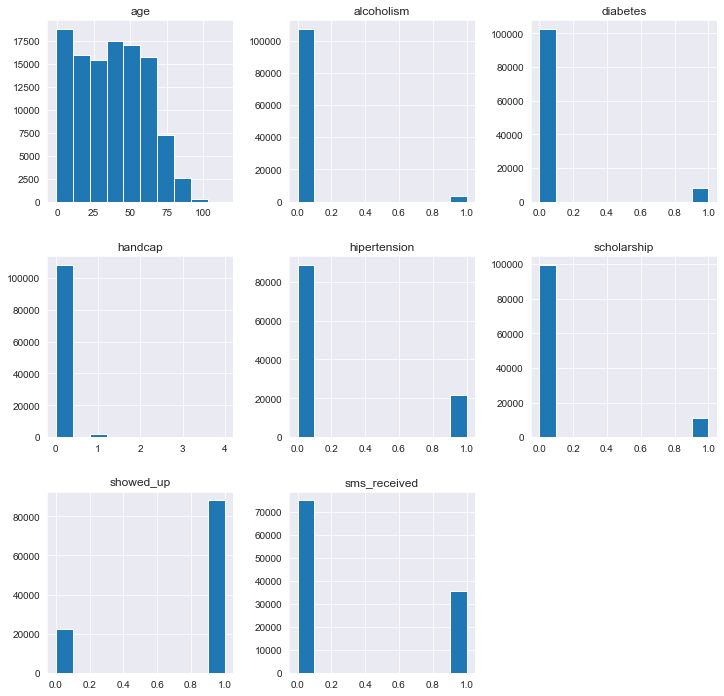

In [13]:
df.hist(figsize = (12, 12));

More people showed up for the appointment. Very less people with the above mentioned traits.

Q1. Were the amount of people who received SMS compared to those who didn't, showed up more or not?

In [14]:
df.sms_received.value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

In [15]:
df_sms_r = df.query('sms_received == 1')
df_sms_nr = df.query('sms_received == 0')

In [16]:
show_sms_mean = df_sms_r.showed_up.mean()
show_sms_mean

0.7242545516036301

In [17]:
no_show_sms_mean = df_sms_nr.showed_up.mean()
no_show_sms_mean

0.8329668865347458

In [30]:
def bar_plot_func(location, height, title, xlabel, ylabel):
    plt.bar(location, height)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
    return 0

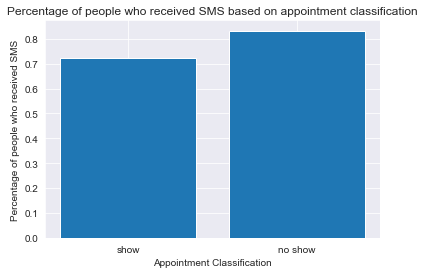

In [31]:
#plt.bar(["show", "no show"], [show_sms_mean, no_show_sms_mean])
#plt.title("Percentage of people who received SMS based on appointment classification")
#plt.xlabel("Appointment Classification")
#plt.ylabel("Percentage of people who received SMS");

# Defining the variables to plot
loc_sms = ["show", "no show"]
height_sms = [show_sms_mean, no_show_sms_mean]
title_sms = "Percentage of people who received SMS based on appointment classification"
xlabel_sms = "Appointment Classification"
ylabel_sms = "Percentage of people who received SMS"

# Calling the bar plot function
bar_plot_func(loc_sms, height_sms, title_sms, xlabel_sms, ylabel_sms);

Q2. Age factor

In [20]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [21]:
# Dropping the rows with negative age(s)
df = df.query('age >= 0')

In [22]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

In [23]:
df.age.max()

115

In [24]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 2, 12, 18, 60, 115]

In [25]:
# Labels for the four acidity level groups
bin_names = ['Baby', 'Child', 'Adolescence', 'Adult', 'Old Adults']

In [26]:
# Creates age_group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names, include_lowest=True)

# Checks for successful creation of this column
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,1,Old Adults
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,1,Adult
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,1,Old Adults
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,1,Child
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,1,Adult


In [27]:
# Use groupby to get the mean quality for each acidity level
age_showed_up_means = df.groupby('age_group')['showed_up'].mean()
age_showed_up_means

NameError: name 'age_showed_up_mean' is not defined

In [ ]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4, 5]
heights = age_showed_up_means
labels = age_showed_up_means.index.str.replace('_', ' ').str.title()
plt.bar(locations, heights, tick_label=labels)
plt.title('Percentage of show up by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of show up');

In [ ]:
plt.plot(labels, heights) 

Q3. Difference between the scheduled time & appointment time in terms of days affecting whether a showed up or not.

In [ ]:
# Normalize the dates
df['scheduledday'] = df.scheduledday.dt.normalize()
df['appointmentday'] = df.appointmentday.dt.normalize()

In [ ]:
# Calculating the difference between two dates in a new column
df['diff_days'] = df['appointmentday'] - df['scheduledday']

# Convert the difference in terms of days
df['diff_days'] = df['diff_days'] / np.timedelta64(1, 'D')

In [ ]:
df.head()

In [ ]:
show = df.showed_up == 1
no_show = df.showed_up == 0

In [ ]:
show_days_mean = df.diff_days[show].mean()
show_days_mean

In [ ]:
no_show_days_mean = df.diff_days[no_show].mean()
no_show_days_mean

In [ ]:
plt.bar(["show", "no show"], [show_days_mean, no_show_days_mean])
plt.title("Mean of Difference between the scheduled time & appointment time in days")
plt.xlabel("Appointment Classification")
plt.ylabel("Mean of difference in days");

The number of people who showed up have less mean difference in days compared to the people who didn't show up because they have more mean difference between the scheduled time & appointment time in days.

In [ ]:
from subprocess import call


call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])